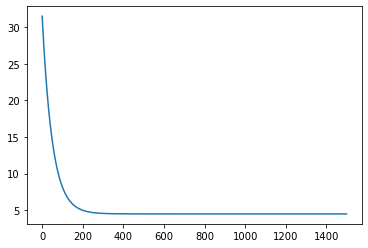

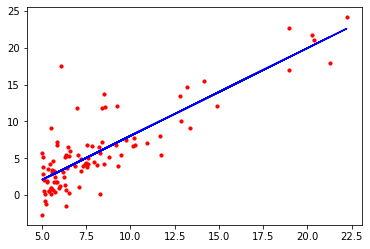

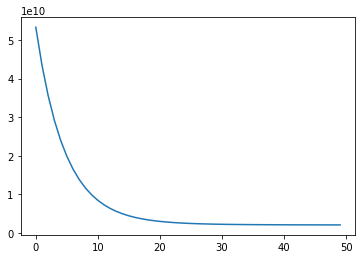

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self,X,y,normalize=False):
        self.X = np.array(X,copy=True)
        self.y = np.array(y,copy=True)
        if X.ndim == 1: 
            X = X[:,None]
        self.mu = self.sigma = None
        if normalize:
            X,self.mu,self.sigma = self.FeatureNormalize(X)
        m,n = X.shape
        self.X = np.column_stack((np.ones((len(X),1)),X))
    def FeatureNormalize(self,X):
        X = np.array(X,copy=True)
        m,n = X.shape
        mu = np.mean(X,axis=0)
        sigma = np.std(X,axis=0,ddof=1)
        for i in range(n):
            X[:,i] = (X[:,i] - mu[i])/(sigma[i] + 1e-100)
        return X,mu,sigma
    def J(self,theta):
        m,n = self.X.shape
        theta = np.array(theta,copy=True)
        err = self.X@theta - self.y
        j = 1/(2*m)*err@err
        return j
    def GradientDescent(self,alpha,theta=None,steps=1000):
        m,n = self.X.shape
        if theta:
            theta = np.array(theta,copy=True)
        else:
            theta = np.zeros(n)
        J = []
        for i in range(steps):
            dJdtheta = 1/m*self.X.T@(self.X@theta-self.y)
            theta = theta - alpha*dJdtheta
            J.append(self.J(theta))
        return theta,np.array(J)
    def NormalEqn(self):
        X,XT,y = self.X,self.X.T,self.y
        return np.linalg.pinv(XT@X)@XT@y
    def predict(self,X,theta):
        X = np.array(X,copy=True)
        if self.mu is not None:
            if X.ndim == 1: 
                X = X[:,None]
            m,n = X.shape
            for i in range(n):
                X[:,i] = (X[:,i] - self.mu[i])/(self.sigma[i] + 1e-100) 
        X = np.column_stack((np.ones((len(X),1)),X))
        theta = np.array(theta,copy=True)
        return X@theta
    
with open("ex1data1.txt","rb") as f:
    data = np.loadtxt(f,delimiter=",")
X = data[:,0]
y = data[:,1]
LR = LinearRegression(X,y,normalize=True)
theta,J = LR.GradientDescent(0.01,steps=1500)
theta = LR.NormalEqn()
plt.plot(J)
plt.show()
#print(LR.predict([3.5,7],LR.NormalEqn()))
plt.scatter(X,y,s=10,color="red")
plt.plot(X,LR.predict(X,theta),color="blue")
plt.show()

with open("ex1data2.txt","rb") as f:
    data = np.loadtxt(f,delimiter=",")
X = data[:,0:2]
y = data[:,2]
LR = LinearRegression(X,y,normalize=True)
theta,J = LR.GradientDescent(0.1,steps=400)
theta = LR.NormalEqn()
plt.plot(J[0:50])
plt.show()
